In [1]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

In [2]:
pd.options.display.max_colwidth = 200

In [3]:
initial_data = pd.read_csv('../data/products_cleaned.csv')
postprocessing = pd.read_csv('../data/postprocessing.csv')
df = initial_data.join(postprocessing.set_index('id'), on='id')
df.to_csv('../data/results.csv', index=False)

In [4]:
def get_image(itemid):
    img_address ='../data/img_n/'+itemid+'.jpg'
    image = Image.open(img_address)
    return image.convert("RGB")

def print_images(idlist,categorylist,title,columns):
    rows = int(len(idlist)/columns)
    fig = plt.figure(figsize=(15, rows*4))
    fig.suptitle(title,fontsize=20)
    
    ax = []
    for i in range(columns*rows):
        img = get_image(idlist[i])
        ax.append(fig.add_subplot(rows, columns, i+1))
        ax[-1].set_title(categorylist[i])
        plt.imshow(img, alpha=0.9)
        plt.axis('off')
    plt.show()  

During post-processing I calculated the following features for each item:
* __image_gt_distance__ - distance between ground truth category assigned by user and image-based model prediction  
* __description_gt_distance__ - between ground truth category and description-based model prediction  
* __title_gt_distance__ - between ground truth category and title-based model prediction  
* __description_title_distance__ - distance between predictions of title and description classifiers.
* __description_image_distance__ - distance between predictions of image and description classifiers.
* __title_image_distance__ - distance between predictions of title and image classifiers.
* __image_class_prediction__ - category predicted by image classifier
* __image_probability__ - probability of the predicted category by image classifier
* __description_class_prediction__ - category predicted by description classifier
* __description_probability__ - probability of the predicted category by description classifier
* __title_class_prediction__ - category predicted by title classifier
* __title_probability__ - probability of the predicted category by title classifier

## In the next sections you will see the examples of items which have the biggest and smallest distance between the predictions of classifiers

# 1.1 Images which are not conform to the category

* Sorting the dataframe to get the items with biggest and smallest distance between ground-truth category and model prediction based on image.
* Visualizing item images and categories defined by users.

## Observations about inconsistency (check pic. 1.1a):
- Users can assign completely wrong category to the item
- Users can assign more general category (f.e. microphone is assigned to 'studio equipment' but there is 'microphones' category)
- Users are not sure about item category and can choose 'Other' category.

In [5]:
df_image_worst = df.sort_values(by='image_gt_distance', ascending=False)[IMAGE_COLUMNS].head(8)
df_image_worst

id                        category  \
2877  m42607432722          Instrument Accessories   
1223  m97007618259  DJ, Electronic Music & Karaoke   
6616  m65043767214            Stringed Instruments   
6690  m75171379531                    Bass Guitars   
1671  m43556759879  DJ, Electronic Music & Karaoke   
204   m44739628005                           Other   
2574  m10982656892          Instrument Accessories   
2880  m52666558700          Instrument Accessories   

           image_class_prediction  image_gt_distance  image_probability  
2877  Wind & Woodwind Instruments           0.832339           0.961939  
1223                    Keyboards           0.831901           0.998345  
6616         Amplifiers & Effects           0.831525           0.632899  
6690         Amplifiers & Effects           0.831410           0.916518  
1671                      Guitars           0.831115           0.914163  
204        Instrument Accessories           0.831057           0.916435  
2574  Wind & Woodwind Instruments           0.831050           0.841421  
2880  Wind & Woodwind Instruments           0.830983           0.881933

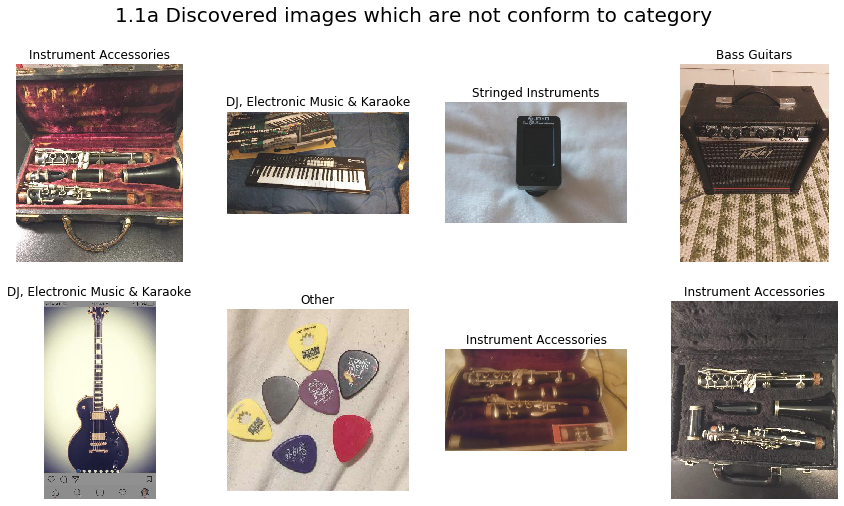

In [6]:
print_images(df_image_worst['id'].values,df_image_worst['category'].values
             ,title='1.1a Discovered images which are not conform to category',columns = 4)

In [7]:
df_image_best = df.sort_values(by='image_gt_distance', ascending=True)[IMAGE_COLUMNS].head(8)
df_image_best

id            category image_class_prediction  \
7822  m67353425500  Drums & Percussion     Drums & Percussion   
9491    m624529520   Brass Instruments      Brass Instruments   
6978    m573817474  Drums & Percussion     Drums & Percussion   
8215  m39410678517           Keyboards              Keyboards   
8160  m91307772743           Keyboards              Keyboards   
7830  m82799725893  Drums & Percussion     Drums & Percussion   
7881  m48912803921           Keyboards              Keyboards   
8573  m71238808766           Keyboards              Keyboards   

      image_gt_distance  image_probability  
7822           0.001087           0.999997  
9491           0.006519           0.999877  
6978           0.006804           0.999866  
8215           0.009720           0.999728  
8160           0.010001           0.999711  
7830           0.010285           0.999695  
7881           0.011777           0.999600  
8573           0.013309           0.999489

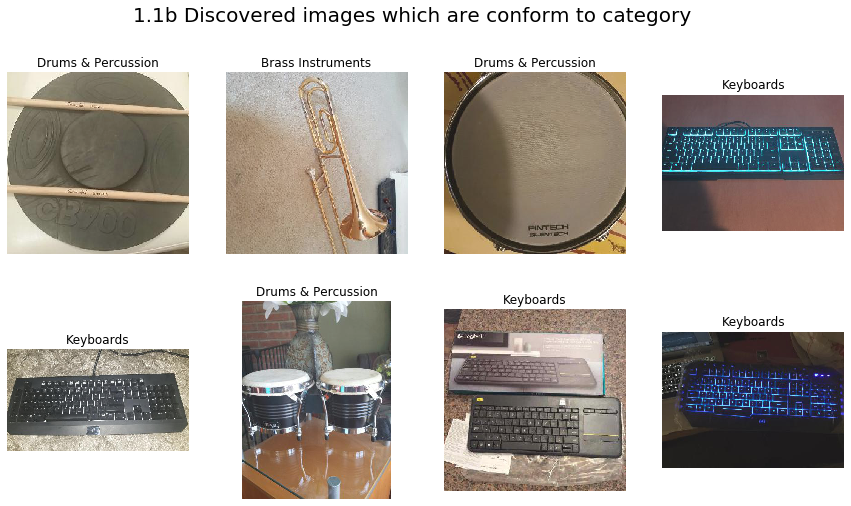

In [8]:
print_images(df_image_best['id'].values,df_image_best['category'].values
             ,title='1.1b Discovered images which are conform to category',columns = 4)

# 1.2 Descriptions which are not conform to the category
* Sorting the dataframe to get the items with greatest distance between ground-truth category and model prediction based on item description.

## Observations (check table below):
* Based on the results the description/category mismatch happens because __in description columns users describe not the item they are selling, but the additional supplements__. Description-based classifier predicts the category of supplements, not the item itself. 
* Also there are cases when user chooses incorrect item category (same as 1.1) but description-based classifier detects the correct one.
* Some users describe the state of the item. In this case the description can be same for multiple categories. 

In [9]:
print('Items description and category inconsistency')
df.sort_values(by='description_gt_distance', ascending=False)[DESCRIPTION_COLUMNS].head(10)

Items description and category inconsistency


id                                     name  \
5577  m56353762366              Guitar USB Flash drive 16GB   
7487  m34688637258                            Drum Clip Kit   
6462  m31353003309                     3 Felt Ukulele Picks   
6055    m151426794                              Mini violin   
1202  m92613414033                          Instrument Case   
6684  m35539269899                               MIDI Cable   
6866  m26725743850  (5) PC - Yeah Bass Clear Calls Or Songs   
3318    m833303947        Armstrong 102 C-foot Silver Flute   
498   m11811421560                          Mesh pop filter   
1705  m90840745785     Electric Guitar W/case And Amplifier   

                                                                                                                                                                                                  description  \
5577                                                                                                                                                                           Fun USB Flash Drive!Guitar16GB   
7487                                                                                                                                                  Brand new, still in box. Comes with contact microphone.   
6462                                                                                                                                                                                             3 felt picks   
6055                                                                                                                                                             Cool little novelty piece,,about 7 inches,,,   
1202                                                                                                                                              Brand New Case , Tags Torn OffFor Small String Instruments!   
6684                                        Cable IN-OUT MIDI to USB, interface cable FTP Chip ,5 PIN, No Need Drivers and Cnvert Piano Keyboard Instruments with Laptop PC MAC, 1.95m brand new. Never used.   
6866  Yes A Free Night Black Charger Included !   :) Intelligent noise reductionnd you get to choose fromClean cool colors!Look at the price, they are All New!.BUILT IN :*Microphone-Answer and TalkIn a ...   
3318                                                                                                                           excellent condition sells on Reverb for $100+Your gain my loss. Comes with cas   
498                                                                                                                                                                                              Sterling PF2   
1705  This is a Bullet strat guitar, like new. Never been used. Is comes with a case,n amplifier, and a guitar stand. The amplifier comes with amp cord and power cable. Everything is ready and looking f...   

                            category description_class_prediction  \
5577                         Guitars    Microphones & Accessories   
7487              Drums & Percussion    Microphones & Accessories   
6462            Stringed Instruments       Instrument Accessories   
6055            Stringed Instruments                    Keyboards   
1202  DJ, Electronic Music & Karaoke         Stringed Instruments   
6684                    Bass Guitars                    Keyboards   
6866                    Bass Guitars    Microphones & Accessories   
3318                Band & Orchestra         Amplifiers & Effects   
498       Studio Recording Equipment            Brass Instruments   
1705  DJ, Electronic Music & Karaoke         Amplifiers & Effects   

      description_gt_distance  description_probability  
5577                 0.832536                 0.577286  
7487                 0.832510                 0.879376  
6462                 0.832501                 0.991858  
6055                 0.832433     

In [10]:
print('Items description and category consistency')
df.sort_values(by='description_gt_distance', ascending=True)[DESCRIPTION_COLUMNS].head(10)

Items description and category consistency


id                                 name  \
8181   m80857588111               Mini Wireless Keyboard   
7347   m12353232579                      Base Drum Pedal   
8165   m40868087525                     Virtual Keyboard   
8264   m92052008311           Ttesport poseidon Keyboard   
6941     m390748107                            Vic Firth   
10107  m77157953148  "Rock Band" Logitech USB Microphone   
8118   m40276316870                      Yamaha Keyboard   
8053   m26388563884                  Gaming Keyboard New   
9507     m832868118                              Trumpet   
8584   m16552915581            Lenovo Keyboard and Mouse   

                              description                   category  \
8181                    Wireless keyboard                  Keyboards   
7347                           Drum pedal         Drums & Percussion   
8165                  Projection Keyboard                  Keyboards   
8264   Poseidon Keyboard great keyboard x                  Keyboards   
6941                             Drum pad         Drums & Percussion   
10107                      USB Microphone  Microphones & Accessories   
8118                   Keyboard and stand                  Keyboards   
8053                  New gaming Keyboard                  Keyboards   
9507                              Trumpet          Brass Instruments   
8584      Sleek Lenovo Keyboard and Mouse                  Keyboards   

      description_class_prediction  description_gt_distance  \
8181                     Keyboards                 0.000787   
7347            Drums & Percussion                 0.001073   
8165                     Keyboards                 0.001542   
8264                     Keyboards                 0.002480   
6941            Drums & Percussion                 0.002890   
10107    Microphones & Accessories                 0.003242   
8118                     Keyboards                 0.003916   
8053                     Keyboards                 0.004195   
9507             Brass Instruments                 0.004286   
8584                     Keyboards                 0.004575   

       description_probability  
8181                  0.999998  
7347                  0.999997  
8165                  0.999993  
8264                  0.999982  
6941                  0.999976  
10107                 0.999970  
8118                  0.999956  
8053                  0.999949  
9507                  0.999947  
8584                  0.999940

# 1.3  Titles which are not conform to the category
* Sorting the dataframe to get the items with greatest distance between ground-truth category and model prediction based on item title.
## Observations (check table below):
* Some titles are too general and don't conform to assigned category 

In [11]:
print('Items title and category inconsistency')
df.sort_values(by='title_gt_distance', ascending=False)[TITLE_COLUMNS].head(15)

Items title and category inconsistency


id                                      name  \
983     m125933277                           Keyboard bundle   
3700    m878852534              Yamaha piano keyboard EZ-200   
9959    m550042720                        Zildjian stick bag   
9999  m69423151584                              Guitar stand   
9372  m13990073858         Sustain Pedal for Keyboard, Piano   
113   m54796913817    Akai Mpk Mini Mk2 Synthesizer Keyboard   
1705  m90840745785      Electric Guitar W/case And Amplifier   
3409    m856706577                           Electric violin   
2712  m91181003167                                  Drum Pad   
6833    m895893660                                    Guitar   
5005  m74521524145            Electric Piano with Microphone   
9233  m11266304086             Yamaha Keyboard Sustain Pedal   
9680  m58102541426                          ❤️TRUMPET MUTE❤️   
449   m19493820109  (Holding)Akai Professional MPK  keyboard   
3390    m809483421  The Offspring Guitar/Keyboard Sheetmusic   

                            category  title_class_prediction  \
983   DJ, Electronic Music & Karaoke               Keyboards   
3700     Wind & Woodwind Instruments               Keyboards   
9959       Microphones & Accessories      Drums & Percussion   
9999       Microphones & Accessories  Instrument Accessories   
9372            Amplifiers & Effects               Keyboards   
113       Studio Recording Equipment               Keyboards   
1705  DJ, Electronic Music & Karaoke                 Guitars   
3409     Wind & Woodwind Instruments    Stringed Instruments   
2712          Instrument Accessories      Drums & Percussion   
6833                    Bass Guitars                 Guitars   
5005                       Keyboards    Amplifiers & Effects   
9233            Amplifiers & Effects               Keyboards   
9680       Microphones & Accessories       Brass Instruments   
449       Studio Recording Equipment               Keyboards   
3390                Band & Orchestra                 Guitars   

      title_gt_distance  title_probability  
983            0.832555           0.989947  
3700           0.832555           0.985920  
9959           0.832555           0.880618  
9999           0.832554           0.620640  
9372           0.832554           0.987086  
113            0.832552           0.996017  
1705           0.832549           0.632226  
3409           0.832544           0.928607  
2712           0.832543           0.992282  
6833           0.832539           0.915092  
5005           0.832537           0.871239  
9233           0.832537           0.978172  
9680           0.832537           0.589485  
449            0.832523           0.987209  
3390           0.832502           0.410407

In [12]:
print('Items title and category consistency')
df.sort_values(by='title_gt_distance', ascending=True)[TITLE_COLUMNS].head(10)

Items title and category consistency


id      name   category title_class_prediction  \
8130  m25208890887  Keyboard  Keyboards              Keyboards   
8527  m63745514874  keyboard  Keyboards              Keyboards   
8033  m32342558026  Keyboard  Keyboards              Keyboards   
8412  m28015956226  Keyboard  Keyboards              Keyboards   
8391  m88856457793  Keyboard  Keyboards              Keyboards   
7586    m677726103  KEYBOARD  Keyboards              Keyboards   
8127  m27182949823  keyboard  Keyboards              Keyboards   
8352  m89257355648  keyboard  Keyboards              Keyboards   
7592    m979476265  Keyboard  Keyboards              Keyboards   
8461  m39485451234  keyboard  Keyboards              Keyboards   

      title_gt_distance  title_probability  
8130           0.011567           0.999614  
8527           0.011567           0.999614  
8033           0.011567           0.999614  
8412           0.011567           0.999614  
8391           0.011567           0.999614  
7586           0.011567           0.999614  
8127           0.011567           0.999614  
8352           0.011567           0.999614  
7592           0.011567           0.999614  
8461           0.011567           0.999614

# 2 Descriptions which are not conform to titles (top-10)
* Sorting the dataframe to get the items with greatest distance between models predictions based on item title and description respectively.

In [13]:
print('Description, which isn’t conform to title')
df.sort_values(by='description_title_distance', 
                               ascending=False)[DESCRIPTION_TITLE_COLUMNS].head(10)

Description, which isn’t conform to title


id  \
7953   m53169824679   
7487   m34688637258   
8442   m90123696669   
6799     m306864713   
10572  m59494017089   
1781   m34484222575   
4975     m115538603   
3895   m26243523587   
9134   m94685223517   
7787     m643888463   

                                                                                              description  \
7953                                                                       Great for making hip hop beats   
7487                                              Brand new, still in box. Comes with contact microphone.   
8442                                                           It comes with a microphone and an earphone   
6799   Digital precision DD-55 works perfect . I don't have the cable power . But the bttery works well .   
10572                                                           Collapsible Stand with music note reader!   
1781                                                    Pyle pdwm24502 mic VHF wireless microphone system   
4975                                                                     100% brand new. Worth getting it   
3895                                                                            It is a regular harmonica   
9134                                                                  Good Condition. Use For Karaoke Too   
7787                                                                         good shape, adjustable stand   

                         name                        category  \
7953        Mini MPK Keyboard                       Keyboards   
7487            Drum Clip Kit              Drums & Percussion   
8442                    Piano                       Keyboards   
6799              YAMAHA drum              Drums & Percussion   
10572        Microphone Stand       Microphones & Accessories   
1781                       dj  DJ, Electronic Music & Karaoke   
4975            Drum's Sticks              Drums & Percussion   
3895                Harmonica     Wind & Woodwind Instruments   
9134         Guitar Amplifier            Amplifiers & Effects   
7787   Casio keyboard w stand                       Keyboards   

         description_class_prediction          title_class_prediction  \
7953   DJ, Electronic Music & Karaoke                       Keyboards   
7487        Microphones & Accessories              Drums & Percussion   
8442        Microphones & Accessories                       Keyboards   
6799        Microphones & Accessories              Drums & Percussion   
10572          Instrument Accessories       Microphones & Accessories   
1781        Microphones & Accessories  DJ, Electronic Music & Karaoke   
4975                          Guitars              Drums & Percussion   
3895                          Guitars     Wind & Woodwind Instruments   
9134   DJ, Electronic Music & Karaoke            Amplifiers & Effects   
7787           Instrument Accessories                       Keyboards   

       description_title_distance  description_probability  title_probability  
7953                     0.831598                 0.848425           0.997702  
7487                     0.831036                 0.879376           0.967335  
8442                     0.830899                 0.964678           0.954131  
6799                     0.829549                 0.267495           0.991670  
10572                    0.829488                 0.545722           0.960384  
1781                     0.828017                 0.994275           0.998317  
4975                     0.826624                 0.461342           0.991604  
3895                     0.826571                 0.756149           0.958171  
9134                     0.825840                 0.867477           0.674913  
7787                     0.825653                 0.972806           0.993730

In [14]:
print('Descriptions which conform to title')
df.sort_values(by='description_title_distance', 
                               ascending=True)[DESCRIPTION_TITLE_COLUMNS].head(10)

Descriptions which conform to title


id  \
8391  m88856457793   
1420    m271421839   
7859    m436912722   
1767  m59777340900   
8118  m40276316870   
8361  m85419460037   
9657  m31294145337   
8181  m80857588111   
7683    m420562899   
8018  m69861406172   

                                                                                                                    description  \
8391                                                                                         Black iPad mini removable keyboard   
1420                                                                                                                  DJ system   
7859                                                                                                    Full size keyboard dock   
1767                                                                                             Numark Party Mix Dj Controller   
8118                                                                                                         Keyboard and stand   
8361                                                                                                New new keyboard # keyboard   
9657  BRAND NEW!!Professional Condenser Microphone Tabletop microphone mount comes wth professional dual-layer acoustic filter.   
8181                                                                                                          Wireless keyboard   
7683                                                                            World's Most Mini Wireless Keyboard Mouse Combo   
8018                                                                                     2.4G wireless keyboard and mouse combo   

                                  name                        category  \
8391                          Keyboard                       Keyboards   
1420                  Numark DJ system  DJ, Electronic Music & Karaoke   
7859                          Keyboard                       Keyboards   
1767    Numark Party Mix Dj Controller  DJ, Electronic Music & Karaoke   
8118                   Yamaha Keyboard                       Keyboards   
8361                      New Keyboard                       Keyboards   
9657              Condenser Microphone       Microphones & Accessories   
8181            Mini Wireless Keyboard                       Keyboards   
7683                     Mini Keyboard                       Keyboards   
8018  Wireless Keyboard,mouse, And Pad                       Keyboards   

        description_class_prediction          title_class_prediction  \
8391                       Keyboards                       Keyboards   
1420  DJ, Electronic Music & Karaoke  DJ, Electronic Music & Karaoke   
7859                       Keyboards                       Keyboards   
1767  DJ, Electronic Music & Karaoke  DJ, Electronic Music & Karaoke   
8118                       Keyboards                       Keyboards   
8361                       Keyboards                       Keyboards   
9657       Microphones & Accessories       Microphones & Accessories   
8181                       Keyboards                       Keyboards   
7683                       Keyboards                       Keyboards   
8018                       Keyboards                       Keyboards   

      description_title_distance  description_probability  title_probability  
8391                    0.014715                 0.999705           0.999614  
1420                    0.017606                 0.997653           0.997660  
7859                    0.021655                 0.998934           0.999614  
1767                    0.021985                 0.997236           0.995843  
8118                    0.022318                 0.999956           0.998565  
8361                    0.023222                 0.999930           0.998341  
9657                    0.025077                 0.971513           0.967211  
8181                    0.025243                 0.999998           0.998163  
7683        

# 3 Image/Description inconsistency


In [15]:
df_desc_image_worst = df.sort_values(by='description_image_distance', 
                               ascending=False)[DESCRIPTION_IMAGE_COLUMNS].head(6)
df_desc_image_worst

id  \
3318     m833303947   
7787     m643888463   
10161  m51505486045   
4911     m845940598   
9134   m94685223517   
6681     m162883072   

                                                                                     description  \
3318              excellent condition sells on Reverb for $100+Your gain my loss. Comes with cas   
7787                                                                good shape, adjustable stand   
10161                                      Pyle professional lavalier wireless microphone system   
4911                    Like new condition. Only played once. Originally from the Guitar Center.   
9134                                                         Good Condition. Use For Karaoke Too   
6681   Bought an extra set - not needed. Can ship asap - plz look at my other listingso bundle!!   

                        category    description_class_prediction  \
3318            Band & Orchestra            Amplifiers & Effects   
7787                   Keyboards          Instrument Accessories   
10161  Microphones & Accessories       Microphones & Accessories   
4911          Drums & Percussion                         Guitars   
9134        Amplifiers & Effects  DJ, Electronic Music & Karaoke   
6681          Drums & Percussion          Instrument Accessories   

            image_class_prediction  description_image_distance  \
3318   Wind & Woodwind Instruments                    0.819736   
7787                     Keyboards                    0.814376   
10161                    Keyboards                    0.813801   
4911            Drums & Percussion                    0.812773   
9134          Amplifiers & Effects                    0.811441   
6681            Drums & Percussion                    0.809575   

       image_probability  description_probability  
3318            0.821927                 0.736793  
7787            0.980731                 0.972806  
10161           0.969694                 0.979984  
4911            0.975944                 0.746656  
9134            0.943446                 0.867477  
6681            0.981234                 0.336616

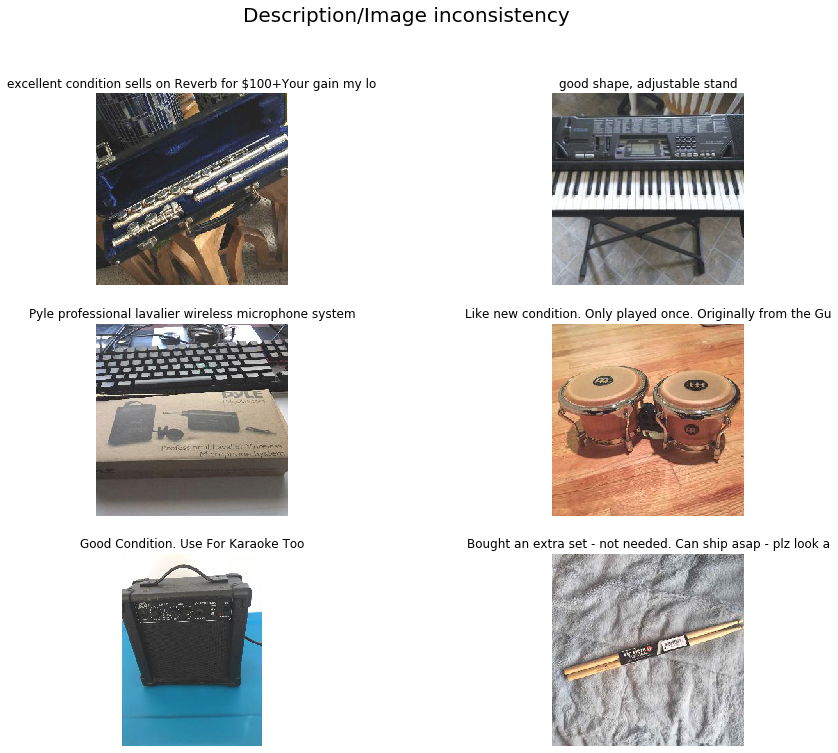

In [16]:
print_images(df_desc_image_worst['id'].values,[f[:60] for f in df_desc_image_worst['description'].values]
             ,title='Description/Image inconsistency',columns = 2)

In [17]:
df_desc_image_best = df.sort_values(by='description_image_distance', 
                               ascending=True)[DESCRIPTION_IMAGE_COLUMNS].head(6)
df_desc_image_best

id  \
8506  m38076036845   
8400  m77579897599   
6814    m538709721   
8758  m44914569781   
7490  m79107179793   
8662  m23612552992   

                                                                                                  description  \
8506                                                   Vintage macintosh keyboard apple design keyboard m2980   
8400                                                               Logitech Wireless Touch Keyboard k400 Plus   
6814  HQ drum pad with Vic Firth 5A drum sticks, lightly used.Feel free to ask any qustions or make an offer.   
8758                                                                           Gaming Keyboard led light good   
7490                                                             remo practice pad .5B - goodwood drum sticks   
8662                                                                            Barely used black hp keyboard   

                category description_class_prediction image_class_prediction  \
8506           Keyboards                    Keyboards              Keyboards   
8400           Keyboards                    Keyboards              Keyboards   
6814  Drums & Percussion           Drums & Percussion     Drums & Percussion   
8758           Keyboards                    Keyboards              Keyboards   
7490  Drums & Percussion           Drums & Percussion     Drums & Percussion   
8662           Keyboards                    Keyboards              Keyboards   

      description_image_distance  image_probability  description_probability  
8506                    0.014955           0.999477                 0.999305  
8400                    0.019724           0.997977                 0.999635  
6814                    0.020939           0.989196                 0.988870  
8758                    0.021975           0.997505                 0.999543  
7490                    0.022681           0.995465                 0.996632  
8662                    0.025039           0.998219                 0.998186

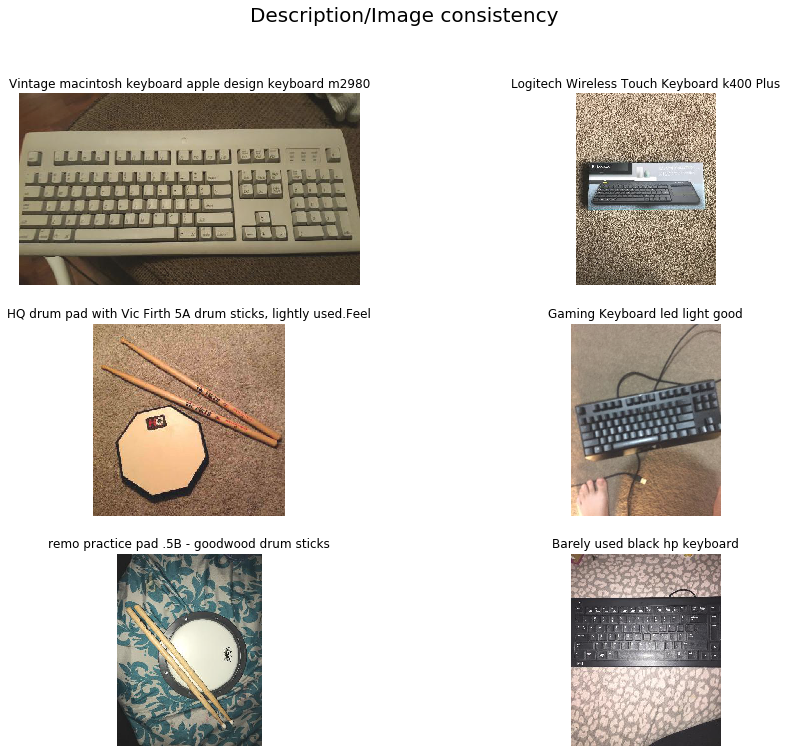

In [18]:
print_images(df_desc_image_best['id'].values,[f[:60] for f in df_desc_image_best['description'].values]
             ,title='Description/Image consistency',columns = 2)

# 3* Image/Title inconsistency


In [19]:
df_title_image_worst = df.sort_values(by='title_image_distance', 
                               ascending=False)[IMAGE_TITLE_COLUMNS].head(9)
df_title_image_worst

id                                   name  \
7487   m34688637258                          Drum Clip Kit   
7643     m743774727              Free ship keyboard vacuum   
5005   m74521524145         Electric Piano with Microphone   
4250   m21457645265                        Hohner Melodica   
553      m956636498                            Akai LPK 25   
7825   m18396467863  Akai Professional MPD18 MIDI Drum Pad   
10219  m98777904207                      Microphone Bundle   
9006     m191892731                                    Amp   
10671  m72122237936           8 Earphones With Microphone.   

                          category     image_class_prediction  \
7487            Drums & Percussion  Microphones & Accessories   
7643                     Keyboards  Microphones & Accessories   
5005                     Keyboards                  Keyboards   
4250   Wind & Woodwind Instruments                  Keyboards   
553     Studio Recording Equipment                  Keyboards   
7825            Drums & Percussion                  Keyboards   
10219    Microphones & Accessories     Instrument Accessories   
9006          Amplifiers & Effects         Drums & Percussion   
10671    Microphones & Accessories     Instrument Accessories   

            title_class_prediction  title_image_distance  image_probability  \
7487            Drums & Percussion              0.825810           0.965871   
7643                     Keyboards              0.818953           0.926085   
5005          Amplifiers & Effects              0.818209           0.973552   
4250   Wind & Woodwind Instruments              0.817398           0.993348   
553     Studio Recording Equipment              0.814042           0.990595   
7825            Drums & Percussion              0.813385           0.882530   
10219    Microphones & Accessories              0.813229           0.647080   
9006          Amplifiers & Effects              0.811360           0.260629   
10671    Microphones & Accessories              0.811343           0.624632   

       title_probability  
7487            0.967335  
7643            0.951613  
5005            0.871239  
4250            0.649463  
553             0.501633  
7825            0.978772  
10219           0.959504  
9006            0.982273  
10671           0.919471

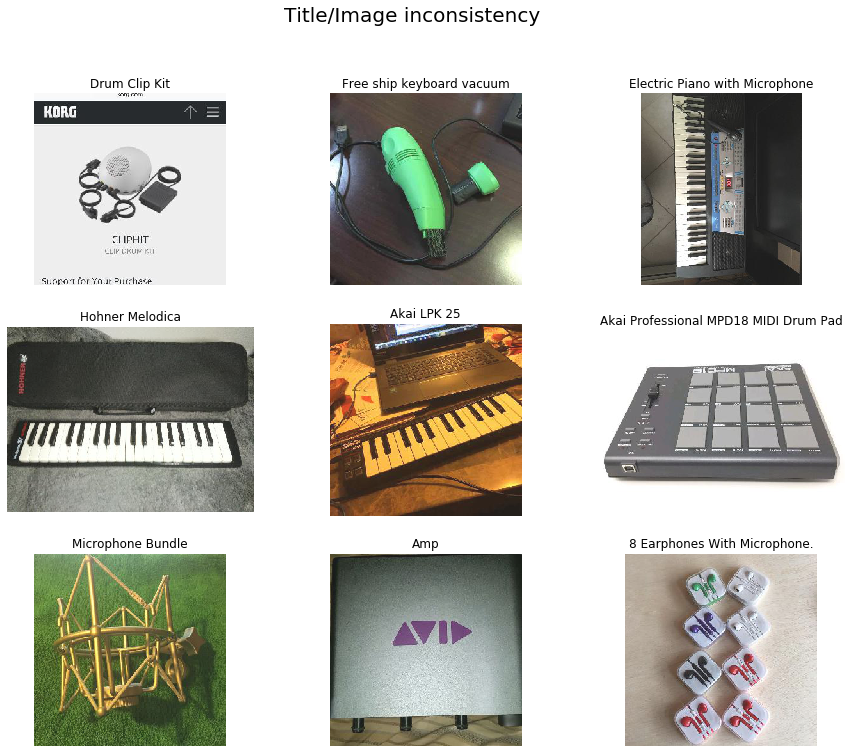

In [20]:
print_images(df_title_image_worst['id'].values,df_title_image_worst['name'].values
             ,title='Title/Image inconsistency',columns = 3)

In [21]:
df_title_image_best = df.sort_values(by='title_image_distance', 
                               ascending=True)[IMAGE_TITLE_COLUMNS].head(9)
df_title_image_best

id                         name                   category  \
7660    m666034056               Keyboard piano                  Keyboards   
9995  m67481853272                   Microphone  Microphones & Accessories   
8206  m90505117248  Wireless Keyboard and Mouse                  Keyboards   
8051  m62558293840   KEYBOARD!! Gaming Keyboard                  Keyboards   
8359  m30661345011  Casio 66 Key Piano Keyboard                  Keyboards   
8445  m14933039549         A Bluetooth Keyboard                  Keyboards   
7629    m842386401              Yamaha Keyboard                  Keyboards   
5562  m58758798024                 Guitar picks                    Guitars   
8698  m10390794586               apple keyboard                  Keyboards   

         image_class_prediction     title_class_prediction  \
7660                  Keyboards                  Keyboards   
9995  Microphones & Accessories  Microphones & Accessories   
8206                  Keyboards                  Keyboards   
8051                  Keyboards                  Keyboards   
8359                  Keyboards                  Keyboards   
8445                  Keyboards                  Keyboards   
7629                  Keyboards                  Keyboards   
5562     Instrument Accessories     Instrument Accessories   
8698                  Keyboards                  Keyboards   

      title_image_distance  image_probability  title_probability  
7660              0.026948           0.998000           0.998969  
9995              0.028662           0.994478           0.991541  
8206              0.031474           0.998517           0.997826  
8051              0.031694           0.997292           0.999047  
8359              0.032463           0.997442           0.996619  
8445              0.032886           0.997076           0.997717  
7629              0.033368           0.997564           0.998565  
5562              0.033683           0.784265           0.795599  
8698              0.033987           0.996737           0.996723

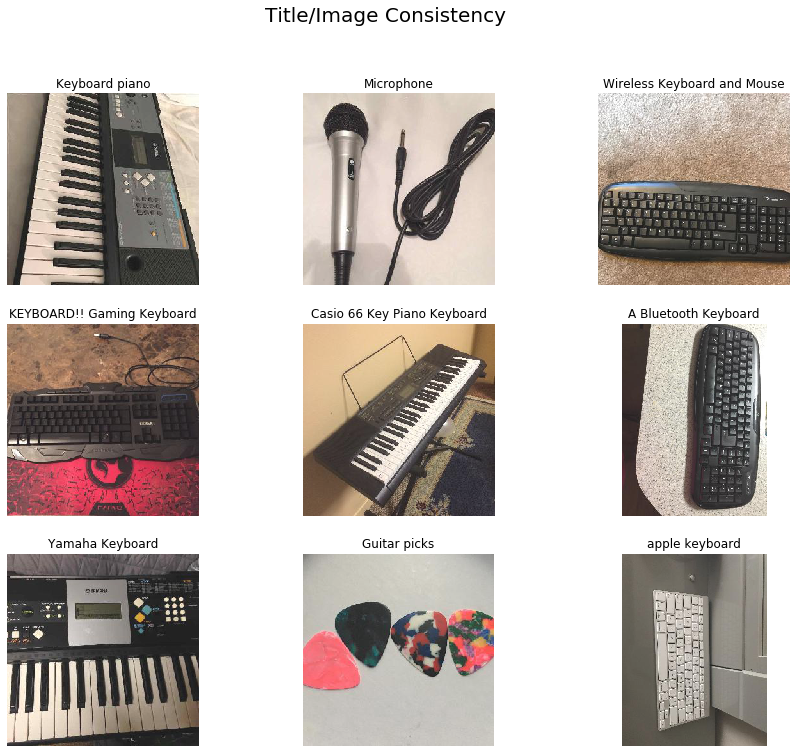

In [22]:
print_images(df_title_image_best['id'].values,df_title_image_best['name'].values
             ,title='Title/Image Consistency',columns = 3)